In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob
from sklearn import linear_model

In [2]:
"""
# raw files
paths = ["DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/", "DataForValidatingModels/Eugene/"]
files = sum([glob.glob(path + "*.csv") for path in paths], [])

#loop over them and create df for each csv
for file in files:
    with open(file, "r") as f:
        f.readline() # skip line
        f.readline() # skip line
        lines = f.readlines()

    with open("cleaned/" + file, "w") as f:
        header = lines[0].split(",")
        f.write(",".join(header) + "\n") # write header
        for line in lines[1:]:
            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns
cleaned_files = ["cleaned/" + file for file in files]
"""

'\n# raw files\npaths = ["DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/", "DataForValidatingModels/Eugene/"]\nfiles = sum([glob.glob(path + "*.csv") for path in paths], [])\n\n#loop over them and create df for each csv\nfor file in files:\n    with open(file, "r") as f:\n        f.readline() # skip line\n        f.readline() # skip line\n        lines = f.readlines()\n\n    with open("cleaned/" + file, "w") as f:\n        header = lines[0].split(",")\n        f.write(",".join(header) + "\n") # write header\n        for line in lines[1:]:\n            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns\ncleaned_files = ["cleaned/" + file for file in files]\n'

In [3]:
"""
# create master csv
counts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []
for file in cleaned_files:
    df = pd.read_csv(file)
    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split("T")[0])
    df["Time Stamp Hour"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split(":")[0])
    df["Time Stamp Hour"] = df["Time Stamp Hour"].str.replace('T', " ")
    df_filtered = df.groupby(["Time Stamp Hour"], as_index=False).first()
    #df_filtered = df
    site = file.split("/")[2]
    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]
    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):
        df_filtered["Cleaned"] = 1
    else:
        df_filtered["Cleaned"] = 0
    counts[site] += 1
    dfs.append(df_filtered)
df = pd.concat(dfs)
#df.to_csv("solar-panels.csv")
df.to_csv("solar-panels-all.csv")
"""


'\n# create master csv\ncounts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []\nfor file in cleaned_files:\n    df = pd.read_csv(file)\n    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split("T")[0])\n    df["Time Stamp Hour"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split(":")[0])\n    df["Time Stamp Hour"] = df["Time Stamp Hour"].str.replace(\'T\', " ")\n    df_filtered = df.groupby(["Time Stamp Hour"], as_index=False).first()\n    #df_filtered = df\n    site = file.split("/")[2]\n    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]\n    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):\n        df_filtered["Cleaned"] = 1\n    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):\n        df_filtered["Cleaned"] = 1\n    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):\n        df_filtered["Cleaned"] = 1\n    el

In [4]:
# read data
#df = pd.read_csv("solar-panels.csv")
df = pd.read_csv("solar-panels-all.csv")
del df["Unnamed: 0"]
df[df["Site"] == "Cocoa"].sort_values(by = ["Time Stamp Hour"]).head(50)


,Time Stamp Hour,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),Pmp uncertainty (%),...,Solar QA residual (W/m2) = Direct*cos(zenith) + Diffuse Horiz. Global Horiz,PV module soiling derate,Daily maintenance start time (hour: minute) - no maintenance that day = 99:99,Daily maintenance end time (hour: minute) - no maintenance that day = 99:99,Precipitation prior to daily maintenance (mm) accumulated daily total,Number of I-V curve data pairs (n),Time Stamp,Site,Site Index,Cleaned
0,2011-01-21 08,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,0.7,1.0,10:48,10:54,24.7,187,2011-01-21,Cocoa,0,0
24280,2011-01-21 08,2011-01-21T08:15:10,35.2,10.6,19.0,1.9,0.0901,5.6,1.7856,5.6,...,0.7,1.0,10:48,10:54,24.7,182,2011-01-21,Cocoa,6,0
40211,2011-01-21 08,2011-01-21T08:15:05,35.1,10.7,19.0,1.9,0.1806,4.2,2.1674,4.2,...,0.7,1.0,10:48,10:54,24.7,183,2011-01-21,Cocoa,10,0
4112,2011-01-21 08,2011-01-21T08:15:01,34.9,10.7,19.0,1.9,0.0979,2.6,1.1265,2.7,...,0.7,1.0,10:48,10:54,24.7,186,2011-01-21,Cocoa,1,0
12045,2011-01-21 08,2011-01-21T08:10:26,20.2,17.8,19.3,1.9,0.0189,12.8,1.9610,12.8,...,0.4,1.0,10:48,10:54,24.7,182,2011-01-21,Cocoa,3,0
32486,2011-01-21 08,2011-01-21T08:15:06,35.1,10.7,19.0,1.9,0.1929,3.9,2.4444,4.0,...,0.7,1.0,10:48,10:54,24.7,184,2011-01-21,Cocoa,8,0
36565,2011-01-21 08,2011-01-21T08:15:13,35.4,10.6,19.0,1.9,0.2333,0.6,1.4124,0.6,...,0.7,1.0,10:48,10:54,24.7,186,2011-01-21,Cocoa,9,0
7943,2011-01-21 08,2011-01-21T08:15:12,35.3,10.6,18.9,1.9,0.1867,0.7,2.5091,0.7,...,0.7,1.0,10:48,10:54,24.7,183,2011-01-21,Cocoa,2,0
16141,2011-01-21 08,2011-01-21T08:15:15,35.5,10.6,19.7,1.9,0.2000,0.6,6.9664,0.8,...,0.7,1.0,10:48,10:54,24.7,185,2011-01-21,Cocoa,4,0
28371,2011-01-21 08,2011-01-21T08:15:19,35.6,10.6,19.4,1.9,0.0422,5.9,1.2563,5.9,...,0.7,1.0,10:48,10:54,24.7,185,2011-01-21,Cocoa,7,0


In [5]:
#df_weather = pd.read_csv("weather-data.csv")
df_weather = pd.read_csv("weather-data-hourly.csv")
#df_weather["Time Stamp"] = df_weather["date_time"]
df_weather["Time Stamp Hour"] = df_weather["date_time"].apply(lambda x : x.split(":")[0])
zip_dict = {32922: "Cocoa", 97401: "Eugene", 80401: "Golden"}
df_weather["Site"] = df_weather["location"].apply(lambda x : zip_dict[x])
del df_weather["location"]; del df_weather["Unnamed: 0"]
df_weather.head(50)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Time Stamp Hour,Site
0,2011-01-21 00:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,39,94,0.0,1012,20,10,208,15,2011-01-21 00,Cocoa
1,2011-01-21 01:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,40,94,0.0,1011,20,10,215,18,2011-01-21 01,Cocoa
2,2011-01-21 02:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,40,93,0.7,1011,20,10,223,20,2011-01-21 02,Cocoa
3,2011-01-21 03:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,40,93,0.9,1010,20,10,231,23,2011-01-21 03,Cocoa
4,2011-01-21 04:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,48,93,0.5,1010,19,10,239,20,2011-01-21 04,Cocoa
5,2011-01-21 05:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,56,93,0.0,1011,19,10,247,16,2011-01-21 05,Cocoa
6,2011-01-21 06:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,65,93,0.0,1011,19,10,255,13,2011-01-21 06,Cocoa
7,2011-01-21 07:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,67,92,0.0,1011,19,10,269,12,2011-01-21 07,Cocoa
8,2011-01-21 08:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,68,92,0.4,1011,19,10,283,12,2011-01-21 08,Cocoa
9,2011-01-21 09:00:00,0,0,0.0,5.2,5,84,09:11 PM,09:21 AM,08:15 AM,...,70,91,0.5,1011,19,10,297,11,2011-01-21 09,Cocoa


In [20]:
#df_master = df.merge(df_weather, how="left",left_on=["Time Stamp", "Site"], right_on=["Time Stamp", "Site"])
df_master = df.merge(df_weather, how="left",left_on=["Time Stamp Hour", "Site"], right_on=["Time Stamp Hour", "Site"])
#print(df_master[(df_master["WindChillC"].isnull()) & (df_master["Site"] == "Golden")][["Site", "Time Stamp"]].min())
#print(df_master[(df_master["WindChillC"].isnull()) & (df_master["Site"] == "Golden")][["Site", "Time Stamp"]].max())
#df_master
df_master.columns
#df_master.isnull().values.any()

Index(['Time Stamp Hour',
       'Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss',
       'POA irradiance CMP22 pyranometer (W/m2)',
       'POA irradiance uncertainty (%)',
       'PV module back surface temperature (degC)',
       'PV module back surface temperature uncertainty (degC)', 'Isc (A)',
       'Isc uncertainty (%)', 'Pmp (W)', 'Pmp uncertainty (%)', 'Imp (A)',
       'Imp uncertainty (%)', 'Vmp (V)', 'Vmp uncertainty (%)', 'Voc (V)',
       'Voc uncertainty (%)', 'FF (%FF)', 'FF uncertainty (%)',
       'Change in CMP22 during I-V scan +/- W/m2',
       'Change in Li-COR during I-V scan +/- W/m2',
       'MT5 cabinet temperature (degC)', 'Dry bulb temperature (degC)',
       'Dry bulb temperature uncertainty (degC)', 'Relative humidity (%RH)',
       'Relative humidity uncertainty (%RH)', 'Atmospheric pressure (mb)',
       'Atmospheric pressure uncertainty (%)',
       'Precipitation (mm) accumulated daily total',
       'Direct normal irradiance (W/m2)',
       'Di

In [26]:
# filter data
df2 = df_master[df_master["Relative humidity (%RH)"] != -9999]
df3 = df2[df2["POA irradiance CMP22 pyranometer (W/m2)"] <= 1000]

In [8]:
df_cleaned = df3[df3["Cleaned"] == 1]
df_dirty = df3[df3["Cleaned"] == 0]

In [9]:
df_dirty["Year-Month"] = df_dirty["Time Stamp"].apply(lambda x : x.split("-")[0] + "-" + x.split("-")[1])
df_delta = df_dirty.groupby(["Year-Month"], as_index=False).first()
df_delta["Soiling Change"] = df_dirty.groupby(["Year-Month"], as_index=False).min()["PV module soiling derate"] - df_dirty.groupby(["Year-Month"], as_index=False).max()["PV module soiling derate"]

/Users/edwardxiong/opt/miniconda3/envs/pv-ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
"""
plt.scatter(df3["Relative humidity (%RH)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Relative Humidity"); plt.ylabel("Soiling Derate")
plt.title("Soiling Degradation vs Humidity")
"""

'\nplt.scatter(df3["Relative humidity (%RH)"], df3["PV module soiling derate"], color="black") \nplt.xlabel("Relative Humidity"); plt.ylabel("Soiling Derate")\nplt.title("Soiling Degradation vs Humidity")\n'

In [11]:
"""
plt.scatter(df3["PV module soiling derate"], df3["Pmp (W)"], color="black") 
plt.xlabel("Back Temperature"); plt.ylabel("Soiling Derate")
plt.title("Back Temperature Effect on Soiling Degradation")
"""

'\nplt.scatter(df3["PV module soiling derate"], df3["Pmp (W)"], color="black") \nplt.xlabel("Back Temperature"); plt.ylabel("Soiling Derate")\nplt.title("Back Temperature Effect on Soiling Degradation")\n'

Text(0, 0.5, 'Power (W)')

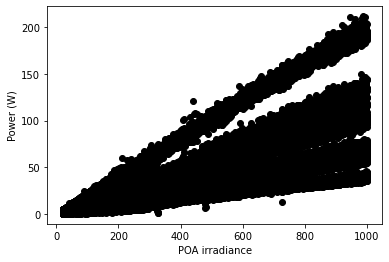

In [34]:
plt.scatter(df3["POA irradiance CMP22 pyranometer (W/m2)"], df3["Pmp (W)"], color = "black")
plt.xlabel("POA irradiance")
plt.ylabel("Power (W)")

In [13]:
"""
print(df["Relative humidity (%RH)"].describe())
print(df3["Relative humidity (%RH)"].describe())
df3["Relative humidity (%RH)"].hist()
"""

'\nprint(df["Relative humidity (%RH)"].describe())\nprint(df3["Relative humidity (%RH)"].describe())\ndf3["Relative humidity (%RH)"].hist()\n'

In [14]:
"""
print(df["PV module back surface temperature (degC)"].describe())
print(df3["PV module back surface temperature (degC)"].describe())
df3["PV module back surface temperature (degC)"].hist()
"""

'\nprint(df["PV module back surface temperature (degC)"].describe())\nprint(df3["PV module back surface temperature (degC)"].describe())\ndf3["PV module back surface temperature (degC)"].hist()\n'

In [15]:
"""
print(df["PV module soiling derate"].describe())
print(df3["PV module soiling derate"].describe())
df3["PV module soiling derate"].hist()
"""

'\nprint(df["PV module soiling derate"].describe())\nprint(df3["PV module soiling derate"].describe())\ndf3["PV module soiling derate"].hist()\n'

In [16]:
"""
print(df["POA irradiance CMP22 pyranometer (W/m2)"].describe())
print(df3["POA irradiance CMP22 pyranometer (W/m2)"].describe())
df3["POA irradiance CMP22 pyranometer (W/m2)"].hist()
"""

'\nprint(df["POA irradiance CMP22 pyranometer (W/m2)"].describe())\nprint(df3["POA irradiance CMP22 pyranometer (W/m2)"].describe())\ndf3["POA irradiance CMP22 pyranometer (W/m2)"].hist()\n'

In [17]:
# create basic regression model
x_vars = ["humidity", "Direct normal irradiance (W/m2)", "PV module back surface temperature (degC)", 
          "tempC", "windspeedKmph", "POA irradiance CMP22 pyranometer (W/m2)", "sunHour", "cloudcover", 
          "precipMM", "winddirDegree", "Global horizontal irradiance (W/m2)", "Diffuse horizontal irradiance (W/m2)",
          "totalSnow_cm"]
y_var = ["Pmp (W)"]

In [18]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_dirty.loc[:, x_vars], df_dirty.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_dirty.loc[:, x_vars])
print("mean y val", np.mean(df_dirty.loc[:, y_var]))
print("mean absolute error", sklearn.metrics.mean_absolute_error(pred, df_dirty.loc[:, y_var]))
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_dirty.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(df_dirty.loc[:, y_var], pred))
print("coefficients", simple_reg.coef_)

mean y val Pmp (W)    28.399152
dtype: float64
mean absolute error 12.070898023564375
mean squared error 468.8705398227616
R2 score 0.5802568076048182
coefficients [[ 2.88404202e-04 -1.71375999e-03 -1.35774989e-03 -4.30796210e-02
   2.09861300e-02  9.04082423e-02  1.17333553e-02  5.23158258e-03
   2.94687854e-01 -1.03727400e-03 -7.60131611e-03  3.17536991e-03
   1.33011826e-01]]


In [19]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_cleaned.loc[:, x_vars], df_cleaned.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_cleaned.loc[:, x_vars])
print("mean y val", np.mean(df_cleaned.loc[:, y_var]))
print("mean absolute error", sklearn.metrics.mean_absolute_error(pred, df_cleaned.loc[:, y_var]))
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_cleaned.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(pred, df_cleaned.loc[:, y_var]))
print("coefficients", simple_reg.coef_)


mean y val Pmp (W)    15.933101
dtype: float64
mean absolute error 0.42962997547216697
mean squared error 0.31643353785783496
R2 score 0.9978911869178477
coefficients [[ 1.64477978e-03 -7.88194103e-04 -4.77735425e-02  1.28770290e-02
   1.01232502e-03  4.78571237e-02  8.68932400e-02  6.78462122e-03
   4.74734462e-01  3.45518743e-04 -5.02325630e-03  2.47183669e-03
  -2.37745001e-02]]
